### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 4
### Due: Saturday, Feb 24th at 11.59pm CST
---

## Problem 1

This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw4_data_1.npy`. This is a (10 x 2) numpy array, with voltage measurements in the first column and heteroscedastic voltage uncertainties in the second column. Compute the sample mean and the standard error on the sample mean for this data.

2) Fit the appropriate ln-likelihood function and find the best-fit mean voltage.

3) Compute and plot the Bayesian posterior probability density (*not the log posterior*) for the mean voltage assuming a uniform prior for the mean in the range 3 to 7. Make sure this posterior pdf is normalized!

4) By either drawing samples from this posterior, or using your gridded posterior pdf to make a cdf, find the equal-tailed 68.3% credible region for the mean, and compare the upper and lower boundaries to the sample mean plus/minus the standard error, respectively. *Also* find the MAP value of the mean.

5) Repeat (3) and (4) this time with a prior on the mean that is uniform in the range 4.6 to 5.4. 

6) Now, imagine that we read an old paper about the experiment that gave us the voltage measurements, and they found that the mean was actually $6\pm0.3$. Repeat (3) and (4) this time with a Gaussian prior on the mean centered at $6$ with standard deviation of $0.3$.

7) Plot all of the normalized posterior pdfs for $\mu$ from (3), (5), and (6) on the same plot, making sure that the xlim of the plot spans 0 to 10.

8) You have made sure that the posterior pdfs are properly normalized, but until now you have ignored the meaning of that normalization constant. It is the Bayesian evidence for the particular model you have applied! Compute the evidence under a new model where the prior for the mean is a delta function at the best-fit value you found in (1) *(think about this and don't just immediately go looking for a `scipy.stats` delta function)*. Compare this to the evidence found under the prior in (3). Taking ratios to make a Bayes factor, which model is favored? Is there much of an Occam penalty by having the wide prior compared to knowing the mean exactly? 

### Solution

In [3]:
#importing tools
import numpy as np
import scipy
import matplotlib.pyplot as plt

#### Part 1

In [4]:
#reading data
data1 = np.load('/home/nowickr/astr_8070_s24/coursework/homeworks/hw_data/hw4_data_1.npy')

In [296]:
#saving data columns as variables
Volt = data1[:,0]
V_unc = data1[:,1]

print(Volt)

[4.36 4.   4.87 5.64 6.14 5.92 3.93 6.58 3.78 5.84]


In [92]:
#Computing sample mean of data
mean_dat1 = np.sum(Volt/(V_unc**2)) / np.sum(1/(V_unc**2))          #eq from lecture 5

#Computing standard error of sample mean of data
stderr_dat1 = (np.sum(1/(V_unc**2)))**(-1/2)                        #eq from lecture 5

print('Sample Mean:', mean_dat1, 'Volts')
print('Standard Error on the Sample Mean:', stderr_dat1, 'Volts')

Sample Mean: 4.942118214425304 Volts
Standard Error on the Sample Mean: 0.43024334605205083 Volts


#### Part 2

In [162]:
#Fit the log likelihood function and determine the best-fit mean voltage

#set up a grid of points between 0 and 10 as potential mu values
mugrid = np.linspace(0,10,1000)


In [163]:
#defining function
def lnL(data,mu,sigma):
    lnLgrid = []
    for i in mu:
        lnLma = (1/2)*np.sum((data-i)**2/(sigma**2))
        lnLgrid.append(lnLma)
    return lnLgrid

In [164]:
#fining optimal mu using lambda function and scipy optimize
lnLopt = lambda x: lnL(data=Volt,mu=x,sigma=V_unc)

output = scipy.optimize.fmin(lnLopt,3)
print('Optimal Mean:', output)

Optimization terminated successfully.
         Current function value: 2.807251
         Iterations: 17
         Function evaluations: 34
Optimal Mean: [4.94208984]


#### Part 3

$${\rm Posterior \,\, Probability} = \frac{{\rm Likelihood}\times{\rm Prior}}{{\rm Evidence}}.$$

In [166]:
#3) Compute and plot the Bayesian posterior probability density (*not the log posterior*) 
# for the mean voltage assuming a uniform prior for the mean in the range 3 to 7. Make sure this posterior pdf is normalized!

#making the uniform prior for the mean
prior = scipy.stats.uniform(loc=3,scale=4)
#prior_grid = np.linspace(3,7,1000)      #test values of sample mean

#defining a function for the (not log) likelihood
def L_notln(data,mu,sigma):
    L_arr = []  #empty array of likelihood values
    for i in mu:
        L = np.prod((1/(np.sqrt(2*np.pi)*sigma))*np.exp(-(data-i)**2/(2*(sigma)**2))) #calculating likelihood
        L_arr.append(L)
    return L_arr

In [167]:
#computing the likelihood using the above (not log) likelihood funciton
Like = L_notln(Volt,mugrid,V_unc)

print(Like)

[2.3911911400489033e-36, 3.122930928922879e-36, 4.076386736487797e-36, 5.318060770000968e-36, 6.934196215145039e-36, 9.036575312297096e-36, 1.1770001906492374e-35, 1.5321952403597524e-35, 1.9935016505127443e-35, 2.5922925109147344e-35, 3.3691188050671934e-35, 4.3763652536472623e-35, 5.681666155116448e-35, 7.372296224186859e-35, 9.560811538815232e-35, 1.2392292419137595e-34, 1.6053637906122652e-34, 2.0785486232033295e-34, 2.689749457092562e-34, 3.47879136697548e-34, 4.496865040192027e-34, 5.809733868649447e-34, 7.501835534684888e-34, 9.681524607964242e-34, 1.2487769777335691e-33, 1.6098704485679674e-33, 2.074253770225729e-33, 2.6711468393210587e-33, 3.437942054957537e-33, 4.4224634997206534e-33, 5.6858431727256046e-33, 7.306180735790606e-33, 9.383197569948943e-33, 1.204415192976868e-32, 1.5451352649256873e-32, 1.981169799003559e-32, 2.538877859184553e-32, 3.251822505937617e-32, 4.1627158983434583e-32, 5.325883052524299e-32, 6.810380782882773e-32, 8.703943815469687e-32, 1.111797461122467

From Lecture 8, I noticed: 

**In the Bayesian case, we also need a prior.**  We'll adopt a *flat uniform distribution* given by

$$p(\mu|I) = C, \; {\rm for} \; \mu_{\rm min} < \mu < \mu_{\rm max},$$

where $C = \frac{1}{\mu_{\rm max} - \mu_{\rm min}}$ between the min and max and is $0$ otherwise.


In [330]:
#defining component of normalization that depends on the prior
mu_max = 7 #upper bound of uniform distribution
mu_min = 3 #lower bound of uniform distribution
C = 1 / (mu_max - mu_min)

In [331]:
#computing the normalization for the posterior, also known as the evidence
Evid = C*np.sum(Like) #we normalize to 1, so summing over all points gives us the cumulative

In [493]:
#computing posterior probability
post = Like * prior.pdf(mugrid) / Evid

#print(post)

Text(0, 0.5, 'Normalized Posterior Probability')

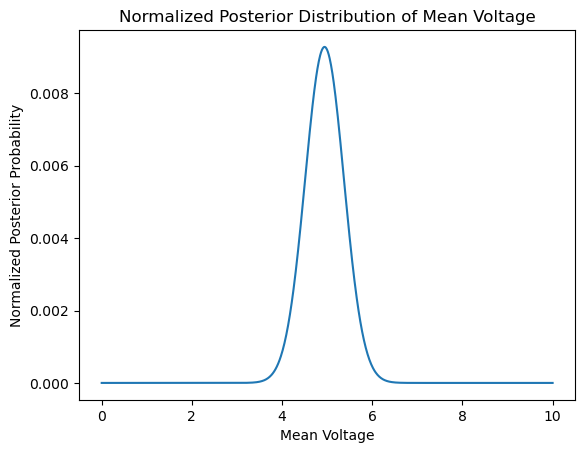

In [492]:
#plotting posterior probability
plt.plot(mugrid,post) #plotting over all tested mus, posterior given prior which is a uniform distribution between 3 and 7
plt.title('Normalized Posterior Distribution of Mean Voltage')
plt.xlabel('Mean Voltage')
plt.ylabel('Normalized Posterior Probability')

#### Part 4

In [334]:
#By either drawing samples from this posterior, or using your gridded posterior pdf to make a cdf, find the equal-tailed 68.3% credible region for the mean
# and compare the upper and lower boundaries to the sample mean plus/minus the standard error, respectively. *Also* find the MAP value of the mean.

#print(post)
#using gridded posterior to make a cdf
post_cdf = []
post_cdf.append(post[0])        #running initial step
for i in range(len(post)-1):    #for loop to add posterior pdfs cumulatively
    cdf_point = post_cdf[i] + float(post[i+1])
    post_cdf.append(cdf_point)

print(post_cdf)

[2.0692267087013966e-31, 4.771667337276462e-31, 8.299184719247091e-31, 1.2901189636159783e-30, 1.890172375132918e-30, 2.6721559931808838e-30, 3.6906777624561866e-30, 5.01656897257196e-30, 6.741653508890928e-30, 8.984904084100769e-30, 1.1900384364815842e-29, 1.568748934283716e-29, 2.0604141617590606e-29, 2.6983787307994896e-29, 3.525727338011725e-29, 4.598099262875621e-29, 5.987307167288096e-29, 7.785987437732258e-29, 1.0113572766698133e-28, 1.3123958632546685e-28, 1.7015338577355538e-28, 2.204281475444219e-28, 2.8534557799432614e-28, 3.6912503403287486e-28, 4.771884436139619e-28, 6.164992194835065e-28, 7.959955897271612e-28, 1.027144337738724e-27, 1.3246480129547674e-27, 1.707347640709823e-27, 2.1993743280557242e-27, 2.8316175671632577e-27, 3.643596279344473e-27, 4.6858417292931174e-27, 6.0229306408366976e-27, 7.73734376068746e-27, 9.934371755801166e-27, 1.2748349220231219e-26, 1.6350571883791294e-26, 2.0959345843817766e-26, 2.685273578506669e-26, 3.4384727984417966e-26, 4.400571127885

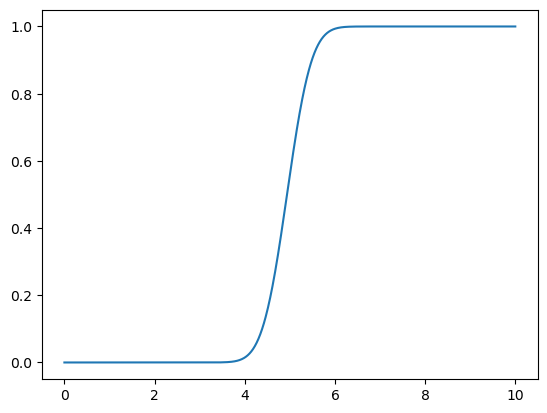

In [335]:
#test plot of post cdf
plt.plot(mugrid, post_cdf)

In [336]:
#Equal tailed credible region cutoffs determined by X% credible region we are looking for
Xcr = 0.683 #setting the credible region we want

#setting the equal tails
low_tail = 0 + ((1-Xcr)/2)
high_tail = 1 - ((1-Xcr)/2)
print(low_tail,high_tail)

#finding the credible region by excluding points not in the region after we scaled the cdf to a percentage
credreg = []        #empty array to hold the values of the cdf in credible region
credreg_mus = []    #empty array to hold the values of the mus in credible region
for i in range(len(post_cdf)):
    if post_cdf[i]>=low_tail and post_cdf[i]<=high_tail:
        credreg_index = i
        credreg.append(post_cdf)
        credreg_mus.append(credreg_index)

0.15849999999999997 0.8415


In [337]:
#getting low and high end of credible region
cred_mu_low = mugrid[credreg_mus[0]]
cred_mu_high = mugrid[credreg_mus[-1]]

print('Mu Boundary of Lower Tail:',cred_mu_low, 'Volts')
print('Mu Boundary of Upper Tail:',cred_mu_high, 'Volts')

Mu Boundary of Lower Tail: 4.514514514514515 Volts
Mu Boundary of Upper Tail: 5.365365365365365 Volts


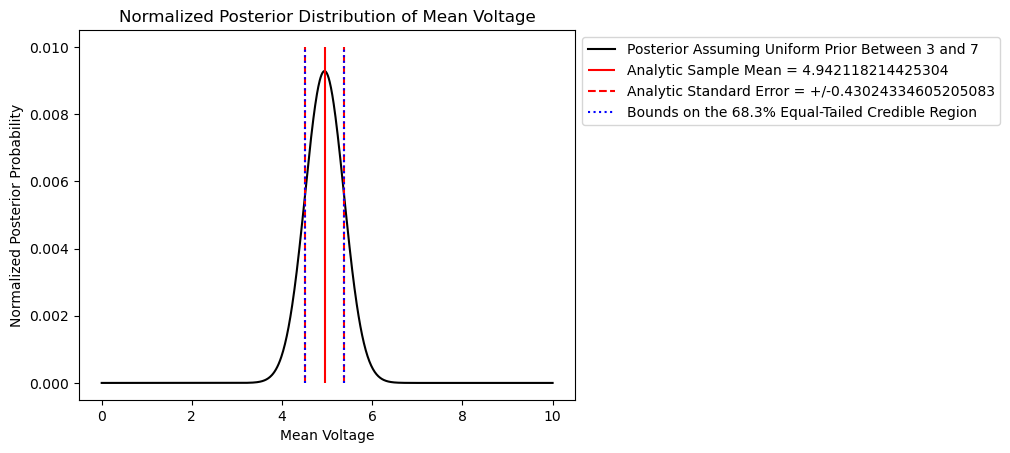

In [338]:
#new plot with credible region and analytic sample mean/stderr plotted too

#first recreate posterior distibution
plt.plot(mugrid,post, color='k', label='Posterior Assuming Uniform Prior Between 3 and 7')
plt.title('Normalized Posterior Distribution of Mean Voltage')
plt.xlabel('Mean Voltage')
plt.ylabel('Normalized Posterior Probability')

#plotting vertical lines of analytic sample mean +/- standard error
plt.vlines(mean_dat1,0,0.01, color='r', label='Analytic Sample Mean = '+str(mean_dat1)) #vertical line at analytic sample mean
plt.vlines(mean_dat1+stderr_dat1,0,0.01, color='r', linestyles="dashed", label='Analytic Standard Error = +/-'+str(stderr_dat1)) #vertical lines one standard error away (positive) from analytic sample mean
plt.vlines(mean_dat1-stderr_dat1,0,0.01, color='r', linestyles="dashed") #vertical lines one standard error away (negative) from analytic sample mean

#plotting credible region
plt.vlines(cred_mu_low,0,0.01, color='b', linestyles="dotted", label='Bounds on the 68.3% Equal-Tailed Credible Region') #vertical line representing lower boundary of 68.3% Equal-tailed credible region
plt.vlines(cred_mu_high,0,0.01, color='b', linestyles="dotted") #vertical line representing upper boundary of 68.3% Equal-tailed credible region

plt.legend(bbox_to_anchor=(1,1))

In [339]:
#Comparison of Credible Region Values and Analytic Results

#calculating values for stderr lines
lsig = mean_dat1-stderr_dat1
hsig = mean_dat1+stderr_dat1

print('Analytic 1-sigma Region:', mean_dat1, '+/-', stderr_dat1)
print('Analytic 1-sigma Region (low, high):', lsig,', ', hsig)

#printing credible region values
print('--------------------------------------------------')
print('68.3% Equal-tail Credible Region:', cred_mu_low, ',', cred_mu_high)

Analytic 1-sigma Region: 4.942118214425304 +/- 0.43024334605205083
Analytic 1-sigma Region (low, high): 4.511874868373253 ,  5.372361560477355
--------------------------------------------------
68.3% Equal-tail Credible Region: 4.514514514514515 , 5.365365365365365


<font color='green'> Comparing the analytically calculated standard error deviations from the analytic sample mean to the boundaries on the credible region computed from the Equal-tailed method, it seems they are quite similar, although the credible region method is only ever so slightly stricter in its bounds (i.e. smaller width of region). This might be attributed to my method given that instead of having a true continuous cdf, I had a gridded one of 1000 points, and the points might not lie perfectly at the boundary of this region like is predicted with the analytical solution. This would only become an issue at precisions of ~1/1000 when the two numbers start to deviate. Given our data, we are only precise to the hundredths, so this approximation is ok (for now). </font>

In [356]:
#Calculating MAP
MAPval = post.max()
MAPindex = np.where(post==MAPval)
#print(MAPval)
#print(MAPindex)
MAPmu = mugrid[MAPindex]
print('Maximum a Posteriori for Mean Voltage:', MAPmu[0])

Maximum a Posteriori for Mean Voltage: 4.944944944944945


#### Part 5

In [380]:
#Repeating steps 3 and 4 but now with a uniform prior between 4.6 and 5.4

#setting up new prior
prior_uni4to5 = scipy.stats.uniform(4.6,0.8) #low end 4.6, width 0.8, should mean upper bound of 5.4

#finding likelihoods
Like_4to5 = L_notln(Volt,mugrid,V_unc) #this is suspiciously similar to pt3...

#computing normalization
mu_max_4to5 = 5.4
mu_min_4to5 = 4.6
C_4to5 = 1/(mu_max_4to5 - mu_min_4to5)
Evid_4to5 = np.sum(Like_4to5) / C_4to5

In [381]:
#computing posterior with new prior information
post_4to5 = Like_4to5 * prior_uni4to5.pdf(mugrid) / Evid_4to5

Text(0, 0.5, 'Normalized Posterior Probability')

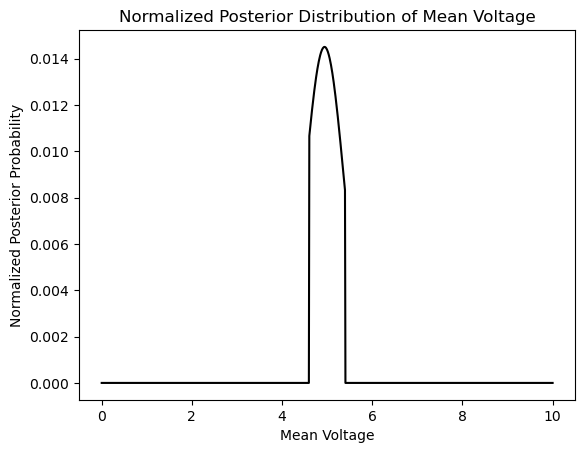

In [382]:
#plotting this new posterior distribution
plt.plot(mugrid, post_4to5, color='k')
plt.title('Normalized Posterior Distribution of Mean Voltage')
plt.xlabel('Mean Voltage')
plt.ylabel('Normalized Posterior Probability')

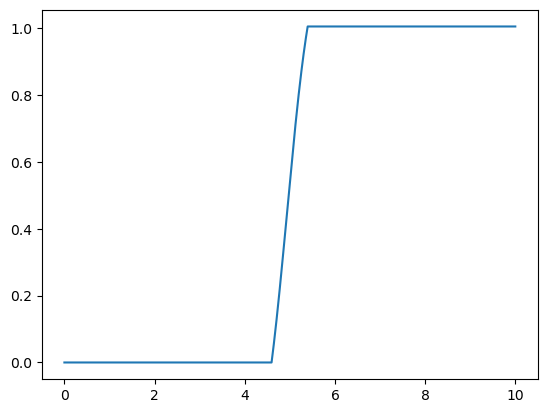

In [383]:
#sampling the posterior and computing the credible region

#using np.cumsum to make cdf of this posterior
post_cdf_4to5 = np.cumsum(post_4to5)

#plotting for my own sanity
plt.plot(mugrid, post_cdf_4to5)

In [384]:
#Equal tailed credible region cutoffs determined by X% credible region we are looking for
Xcr = 0.683 #setting the credible region we want

#setting the equal tails
low_tail = 0 + ((1-Xcr)/2)
high_tail = 1 - ((1-Xcr)/2)
print(low_tail,high_tail)

#finding the credible region by excluding points not in the region after we scaled the cdf to a percentage
credreg_4to5 = []        #empty array to hold the values of the cdf in credible region
credreg_mus_4to5 = []    #empty array to hold the values of the mus in credible region
for i in range(len(post_cdf_4to5)):
    if post_cdf_4to5[i]>=low_tail and post_cdf_4to5[i]<=high_tail:
        credreg_index = i
        credreg.append(post_cdf)
        credreg_mus.append(credreg_index)

0.15849999999999997 0.8415


In [385]:
#defining a function to make computing the credible region easier
def credregion(cdf,X):
    #setting the equal tails
    low_tail = 0 + ((1-X)/2)
    high_tail = 1 - ((1-X)/2)
    print('Tails:',low_tail,high_tail)

    #finding the credible region by excluding points not in the region after we scaled the cdf to a percentage
    credreg = []        #empty array to hold the values of the cdf in credible region
    credreg_mus = []    #empty array to hold the values of the mus in credible region
    for i in range(len(cdf)):
        if cdf[i]>=low_tail and cdf[i]<=high_tail:
            credreg_index = i
            credreg.append(cdf)
            credreg_mus.append(credreg_index)
    return credreg, credreg_mus     #arrays of posterior values in the credible region, associated mu values for those credible region values

In [386]:
#computing credible region using function I built
credregion_4to5 = credregion(cdf=post_cdf_4to5, X=0.683)

Tails: 0.15849999999999997 0.8415


In [388]:
#getting low and high end of credible region
cred_mu_low_4to5 = mugrid[credregion_4to5[1][0]]
cred_mu_high_4to5 = mugrid[credregion_4to5[1][-1]]

print('Mu Boundary of Lower Tail:',cred_mu_low_4to5, 'Volts')
print('Mu Boundary of Upper Tail:',cred_mu_high_4to5, 'Volts')

Mu Boundary of Lower Tail: 4.734734734734735 Volts
Mu Boundary of Upper Tail: 5.225225225225225 Volts


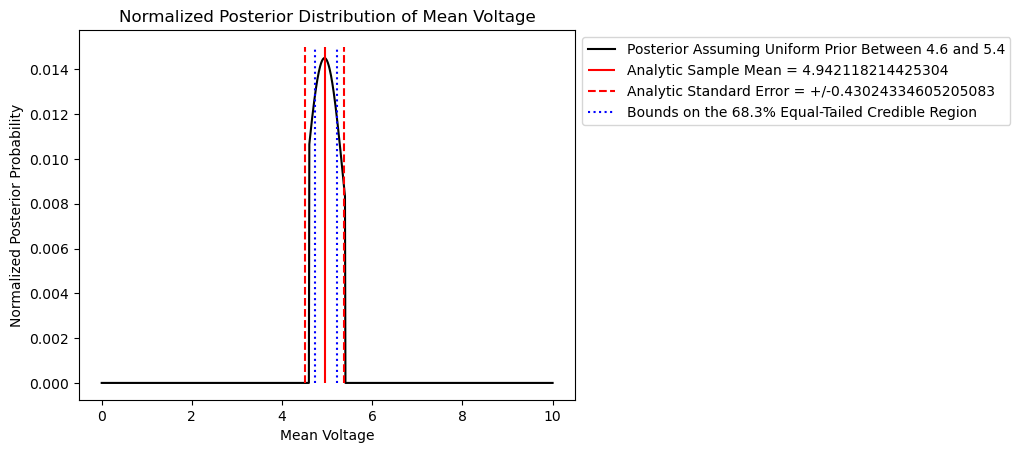

In [390]:
#new plot with credible region and analytic sample mean/stderr plotted too

#first recreate posterior distibution
plt.plot(mugrid,post_4to5, color='k', label='Posterior Assuming Uniform Prior Between 4.6 and 5.4')
plt.title('Normalized Posterior Distribution of Mean Voltage')
plt.xlabel('Mean Voltage')
plt.ylabel('Normalized Posterior Probability')

#plotting vertical lines of analytic sample mean +/- standard error
plt.vlines(mean_dat1,0,0.015, color='r', label='Analytic Sample Mean = '+str(mean_dat1)) #vertical line at analytic sample mean
plt.vlines(mean_dat1+stderr_dat1,0,0.015, color='r', linestyles="dashed", label='Analytic Standard Error = +/-'+str(stderr_dat1)) #vertical lines one standard error away (positive) from analytic sample mean
plt.vlines(mean_dat1-stderr_dat1,0,0.015, color='r', linestyles="dashed") #vertical lines one standard error away (negative) from analytic sample mean

#plotting credible region
plt.vlines(cred_mu_low_4to5,0,0.015, color='b', linestyles="dotted", label='Bounds on the 68.3% Equal-Tailed Credible Region') #vertical line representing lower boundary of 68.3% Equal-tailed credible region
plt.vlines(cred_mu_high_4to5,0,0.015, color='b', linestyles="dotted") #vertical line representing upper boundary of 68.3% Equal-tailed credible region

plt.legend(bbox_to_anchor=(1,1))

<font color='green'> The analytic values DO NOT line up with the credible region anymore! Instead, it looks like they approximate the region we cut off with our uniform prior between 4.6 and 5.4 . This makes sense, as the credible region is based upon what is present, and when our prior tells us that no points should exist beyond the originally calculated standard error, what was once a 68% enclosed region is now a 100% enclosed region, meaning there is a new 68.3% Equal Tailed Credible Region that is narrower.</font>

In [438]:
#Calculating MAP
MAPval_4to5 = post_4to5.max()
MAPindex_4to5 = np.where(post_4to5==MAPval_4to5)
#print(MAPval)
#print(MAPindex)
MAPmu_4to5 = mugrid[MAPindex_4to5]
print('Maximum a Posteriori for Mean Voltage:', MAPmu_4to5[0])

Maximum a Posteriori for Mean Voltage: 4.944944944944945


#### Part 6

In [423]:
#repeating steps 3 and 4 now assuming a Gaussian prior centered on 6 with a stdev of 0.3

#building new prior
prior_Gauss = scipy.stats.norm(6,0.3) #(mean,stdev)

#computing likelihoods again
Like_Gauss = L_notln(Volt,mugrid,V_unc)

#computing normalization
C_Gauss = 1/(10-0) #Gaussian extends forever, so representing that with mu_max and mu_min being the bounds of the grid I have
Evid_Gauss = np.sum(Like_Gauss) * C_Gauss

In [424]:
#computing posterior given Gaussian prior
post_Gauss = Like_Gauss * prior_Gauss.pdf(mugrid) / Evid_Gauss

Text(0, 0.5, 'Normalized Posterior Probability')

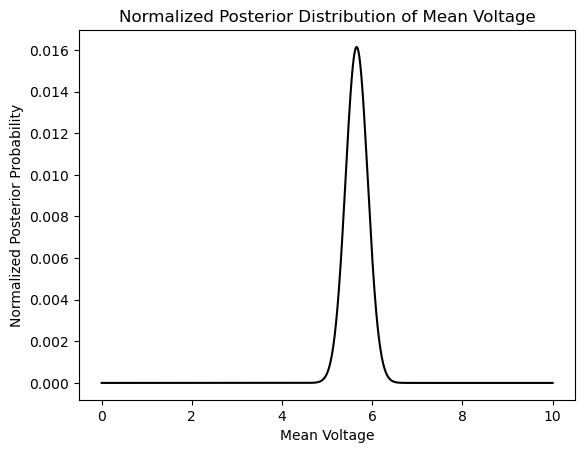

In [425]:
#plotting this new posterior distribution
plt.plot(mugrid, post_Gauss, color='k')
plt.title('Normalized Posterior Distribution of Mean Voltage')
plt.xlabel('Mean Voltage')
plt.ylabel('Normalized Posterior Probability')

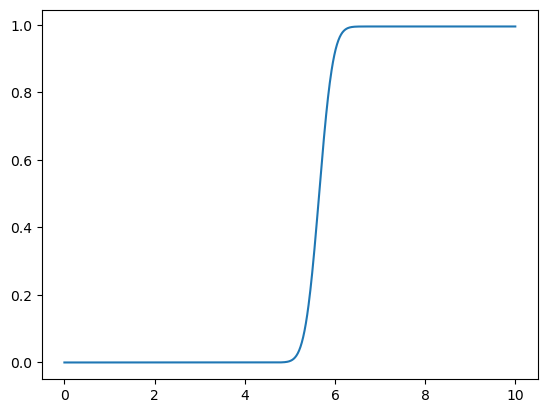

In [426]:
#Now sampling and finding the credible region

#using np.cumsum to make cdf of this posterior
post_cdf_Gauss = np.cumsum(post_Gauss)

#plotting for my own sanity
plt.plot(mugrid, post_cdf_Gauss)

In [427]:
#Finding the credible region assuming the Gaussian prior
credregion_Gauss = credregion(cdf=post_cdf_Gauss, X=0.683)

Tails: 0.15849999999999997 0.8415


In [428]:
#getting low and high end of credible region
cred_mu_low_Gauss = mugrid[credregion_Gauss[1][0]]
cred_mu_high_Gauss = mugrid[credregion_Gauss[1][-1]]

print('Mu Boundary of Lower Tail:',cred_mu_low_Gauss, 'Volts')
print('Mu Boundary of Upper Tail:',cred_mu_high_Gauss, 'Volts')

Mu Boundary of Lower Tail: 5.405405405405405 Volts
Mu Boundary of Upper Tail: 5.895895895895896 Volts


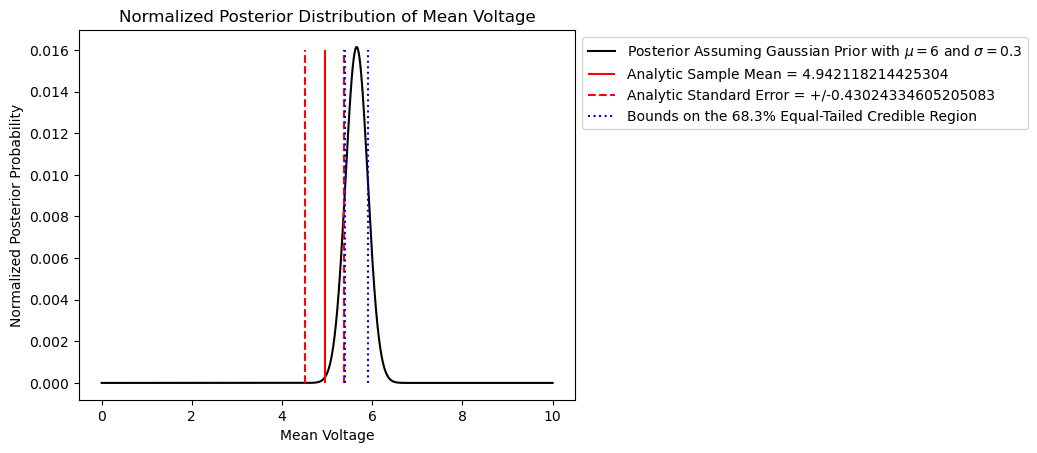

In [431]:
#new plot with credible region and analytic sample mean/stderr plotted too

#first recreate posterior distibution
plt.plot(mugrid,post_Gauss, color='k', label='Posterior Assuming Gaussian Prior with $\mu = 6$ and $\sigma = 0.3$')
plt.title('Normalized Posterior Distribution of Mean Voltage')
plt.xlabel('Mean Voltage')
plt.ylabel('Normalized Posterior Probability')

#plotting vertical lines of analytic sample mean +/- standard error
plt.vlines(mean_dat1,0,0.016, color='r', label='Analytic Sample Mean = '+str(mean_dat1)) #vertical line at analytic sample mean
plt.vlines(mean_dat1+stderr_dat1,0,0.016, color='r', linestyles="dashed", label='Analytic Standard Error = +/-'+str(stderr_dat1)) #vertical lines one standard error away (positive) from analytic sample mean
plt.vlines(mean_dat1-stderr_dat1,0,0.016, color='r', linestyles="dashed") #vertical lines one standard error away (negative) from analytic sample mean

#plotting credible region
plt.vlines(cred_mu_low_Gauss,0,0.016, color='b', linestyles="dotted", label='Bounds on the 68.3% Equal-Tailed Credible Region') #vertical line representing lower boundary of 68.3% Equal-tailed credible region
plt.vlines(cred_mu_high_Gauss,0,0.016, color='b', linestyles="dotted") #vertical line representing upper boundary of 68.3% Equal-tailed credible region

plt.legend(bbox_to_anchor=(1,1))

<font color='green'> Obviously this looks off -- the mean we fed the Gaussian prior existed outside the standard error range we originally calculated for the data! This goes to show how much knowing your prior can affect your results. For example, in this data, either we are very wrong about this prior or our data is heavily biased away from the "truth" of the prior. </font>

In [439]:
#Calculating MAP
MAPval_Gauss = post_Gauss.max()
MAPindex_Gauss = np.where(post_Gauss==MAPval_Gauss)
#print(MAPval)
#print(MAPindex)
MAPmu_Gauss = mugrid[MAPindex_Gauss]
print('Maximum a Posteriori for Mean Voltage:', MAPmu_Gauss[0])

Maximum a Posteriori for Mean Voltage: 5.655655655655655


#### Part 7

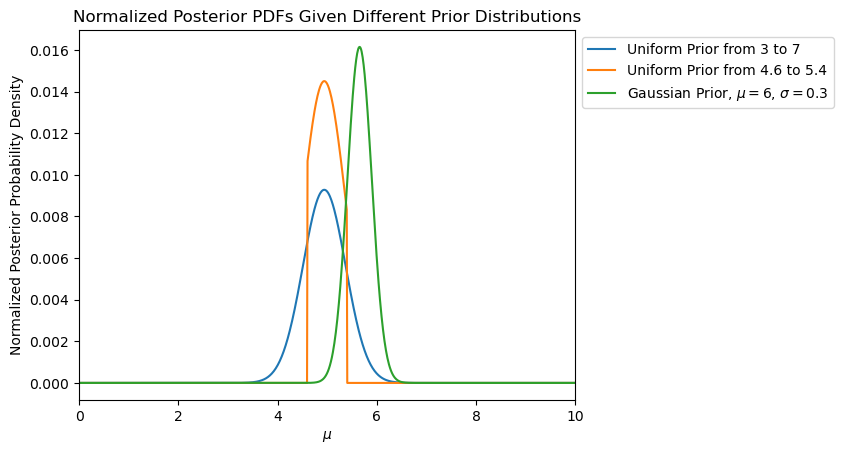

In [436]:
#plotting results from 3,5,6
xgrid = mugrid #np.linspace(0,10,1000) <-- this is the same as mugrid above

plt.plot(xgrid, post, label='Uniform Prior from 3 to 7')
plt.plot(xgrid, post_4to5, label='Uniform Prior from 4.6 to 5.4')
plt.plot(xgrid, post_Gauss, label='Gaussian Prior, $\mu = 6$, $\sigma = 0.3$')
plt.xlabel('$\mu$')
plt.ylabel('Normalized Posterior Probability Density')
plt.xlim(0,10)
plt.title('Normalized Posterior PDFs Given Different Prior Distributions')
plt.legend(bbox_to_anchor=(1,1))

#### Part 8

In [481]:
#You have made sure that the posterior pdfs are properly normalized, but until now you have ignored the meaning of that normalization constant. 
#It is the Bayesian evidence for the particular model you have applied! 

#Compute the evidence under a new model where the prior for the mean is a delta function at the best-fit value you found in (1) 
# *(think about this and don't just immediately go looking for a `scipy.stats` delta function)*. 

#defining a delta function
def delt(xgrid, mu):
    delt = []
    munew = round(mu,2)
    for i in range(len(xgrid)):
        xnewgrid = round(xgrid[i],2)
        if xnewgrid==munew:
            point = np.inf
        else:
            point = 0
        delt.append(point)
    return delt

In [470]:
print(mugrid[490:495])
print(mean_dat1)

[4.9049049  4.91491491 4.92492492 4.93493493 4.94494494]
4.942118214425304


In [472]:
#building new prior
prior_delta = delt(mugrid,mean_dat1) #delta fucntion, 1 at point, all else 0

#computing likelihoods again
Like_delta = L_notln(Volt,mugrid,V_unc)

#computing normalization
C_delta = np.sum(prior_delta) #now why am i doing this?
Evid_delta = np.sum(Like_delta)

In [476]:
print(C_delta, Evid_delta)

inf inf


In [474]:
#plotting for myself
post_delta = Like_delta * np.array(prior_delta) / Evid_delta

plt.plot(mugrid,post_delta)

TypeError: can't multiply sequence by non-int of type 'numpy.float64'

In [477]:
Evid_Delta = Evid_delta / C_delta

/tmp/ipykernel_331701/1120254445.py:1: RuntimeWarning: invalid value encountered in scalar divide
  Evid_Delta = Evid_delta / C_delta


In [479]:
Evid_Delta = 1

# Compare this to the evidence found under the prior in (3). Taking ratios to make a Bayes factor, which model is favored? 
Bayes_Delta_Unif = Evid_Delta / Evid
print('Bayes Factor of Delta Prior over Wide Uniform Prior:', Bayes_Delta_Unif)

Bayes_delta_unif = Evid_delta / Evid
print('Bayes Factor of Delta Prior over Wide Uniform Prior:', Bayes_delta_unif)

Bayes Factor of Delta Prior over Wide Uniform Prior: 346141.58174893167
Bayes Factor of Delta Prior over Wide Uniform Prior: inf


In [458]:
#Is there much of an Occam penalty by having the wide prior compared to knowing the mean exactly? 

<font color='green'> Hmm </font>

## Problem 2

This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw4_data_2.npy`, which is a (3 x 20) numpy array that you used in `Lecture_9`. Set `x, y, sigma_y = data`. 

We're going to do some polynomial fits to this data just like in `Lecture 9`. However, in all cases you should **keep the $y$-intercept fixed at $-0.23$**. 

2) Use the following code to compute the un-normalized posterior pdf (i.e. just the likelihood x prior) on a grid of the linear coefficient (i.e. the slope) of a linear model, with a uniform prior between 0.5 and 1.5. Plot this posterior pdf. Remember this is just a one-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100.

In [190]:
#Functions to do a polynomial fit, and compute the likelihood
def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    # For a polynomial with order 1, this gives theta_0 + theta_1*x
    # For a polynomial with order 2, this gives theta_0 + theta_1*x + theta_2*x^2, etc.
    return sum(t * x ** n for (n, t) in enumerate(theta))

# compute the data log-likelihood given a model
def logL(theta, data, model=polynomial_fit):
    """Gaussian log-likelihood of the model at theta"""
    x, y, sigma_y = data
    y_fit = model(theta, x)
    return sum(scipy.stats.norm.logpdf(*args) 
               for args in zip(y, y_fit, sigma_y))

3) Using your 1D gridded likelihood-x-prior, compute the Bayesian evidence of this linear model. This may be a big number!

4) Now compute the joint 2D posterior pdf (again just the likelihood x prior) of linear and quadratic coefficients of a quadratic model. Give the linear coefficient a uniform prior between 0.5 and 1.5. Give the quadratic coefficient a uniform prior between -1 and 0.25. Plot this two-dimensional posterior. Remember this is a two-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100 in each model dimension.

5) Using your 2D gridded likelihood-x-prior, compute the Bayesian evidence of the quadratic model. 

6) Calculate the Bayes factor for a linear versus quadratic model. How does this compare/contrast with the BIC model comparison in the lecture? 

### Solution

#### Part 1

In [186]:
#reading data
data2 = np.load('/home/nowickr/astr_8070_s24/coursework/homeworks/hw_data/hw4_data_2.npy')

#setting columns as variables
x, y, sigma_y = data2

In [188]:
print('x:', x)
print('y:', y)

print('Shape of Data2:', data2.shape)

x: [0.42 0.72 0.   0.3  0.15 0.09 0.19 0.35 0.4  0.54 0.42 0.69 0.2  0.88
 0.03 0.67 0.42 0.56 0.14 0.2 ]
y: [ 0.33  0.41 -0.25  0.01 -0.05 -0.05 -0.12  0.26  0.29  0.39  0.31  0.42
 -0.01  0.58 -0.2   0.52  0.15  0.32 -0.13 -0.09]
Shape of Data2: (3, 20)


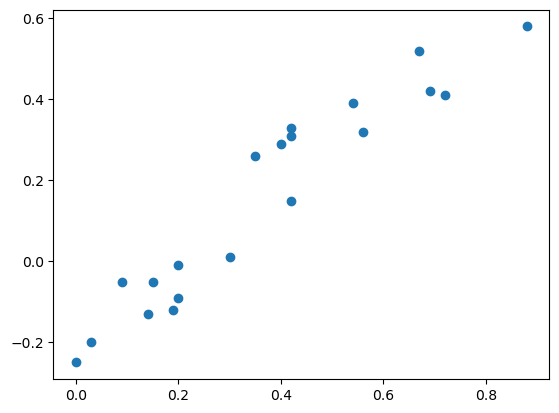

In [200]:
#visualizing these data for my own benefit
plt.scatter(x,y)

In [189]:
#setting y-intercept to be fixed at -0.23
y_int = -0.23

#### Part 2

In [195]:
#Use the [provided functions] to compute the un-normalized posterior pdf (i.e. just the likelihood x prior) on a grid of the linear coefficient (i.e. the slope) 
# of a linear model, with a uniform prior between 0.5 and 1.5. Plot this posterior pdf. Remember this is just a one-dimensional model because the $y$-intercept is fixed. 
# I advise a grid size of 100.

#Building grid
newgrid = np.linspace(0,2,100) #grid size of 100 points between 0 and 2

#building uniform prior
prior2 = scipy.stats.uniform(0.5,1) #starts at 0.5 and has width of 1, meaning high end of 1.5

#computing the likelihood
Like2 = -logL(theta=newgrid,data=data2,model=polynomial_fit)

#computing the un-normalized posterior pdf
post_unnorm = Like2 * prior2.pdf(newgrid)

Text(0.5, 0, 'Hypothetical Values of the Slope')

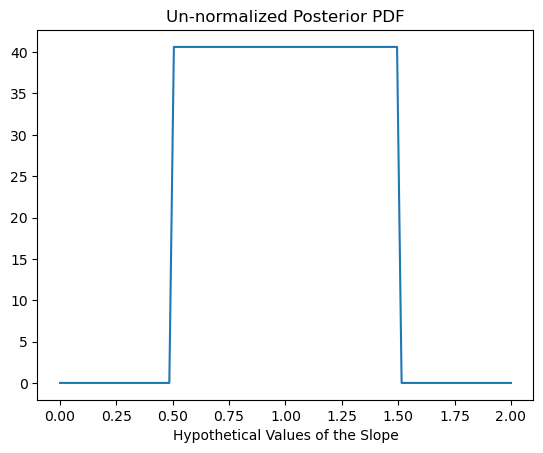

In [198]:
#plotting the unnormalized posterior pdf
plt.plot(newgrid,post_unnorm)
plt.title('Un-normalized Posterior PDF')
plt.xlabel('Hypothetical Values of the Slope')

#### Part 3

In [482]:
#Compute the Bayesian Evidence of this model
Evid2 = np.sum(Like2) #sum of all likelihoods
Evid2 = Evid2 * np.sum(prior2.pdf(newgrid)) #multiplied by the sum of the prior
print('Bayesian Evidence for this Model:',Evid2)

Bayesian Evidence for this Model: 2031.2459538627354


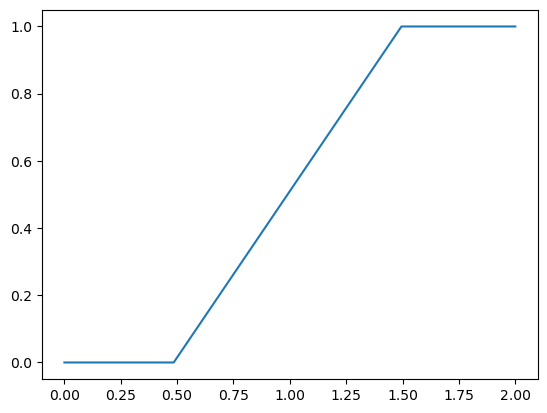

In [484]:
#this cdf plot is proof I've successfully calculated the normalization, as it maxes out at 1.
plt.plot(newgrid,np.cumsum(post_unnorm)/Evid2)

#### Part 4

In [485]:
#Now compute the joint 2D posterior pdf (again just the likelihood x prior) of linear and quadratic coefficients of a quadratic model. 
# Give the linear coefficient a uniform prior between 0.5 and 1.5. Give the quadratic coefficient a uniform prior between -1 and 0.25. 
# Plot this two-dimensional posterior. Remember this is a two-dimensional model because the $y$-intercept is fixed. 
# I advise a grid size of 100 in each model dimension.

newgridquad = np.linspace(-1.5,1.5,100) #new gridspace to test with new prior of quadratic term

#prior for quadratic
prior_quad = scipy.stats.uniform(-1,1.25) #starts at -1, width of 1.25 so it ends at 0.25

In [488]:
#uniting two grids into a single array
grid_combo = np.vstack((newgrid,newgridquad))
#print(grid_combo)

In [496]:
# Plot this two-dimensional posterior. Remember this is a two-dimensional model because the $y$-intercept is fixed. 

#generating log likelihoods first
Like2D = -logL(theta=(newgrid,newgridquad), data=data2, model=polynomial_fit)

ValueError: operands could not be broadcast together with shapes (100,) (20,) 

#### Part 5

In [ ]:
#Using your 2D gridded likelihood-x-prior, compute the Bayesian evidence of the quadratic model. 
Evid2_2D = np.sum(Like2_2D) #sum of all likelihoods

#### Part 6

In [ ]:
#Calculate the Bayes factor for a linear versus quadratic model. How does this compare/contrast with the BIC model comparison in the lecture? 

#Bayes Factor
BF = 

#BIC Model
BIC = 